In [1]:
import sys
sys.path.append("../")
import logging
import random
import torch
import numpy as np
from torchvision import transforms
from federated_learning.FLCustomDataset import FLCustomDataset
from federated_learning.FederatedLearning import FederatedLearning
from federated_learning.helper import utils

In [2]:
CONFIG_PATH = '../configs/defaults.yml'
configs = utils.load_config(CONFIG_PATH)
neptune_enable, log_enable, output_dir = False, False, ""
fl = FederatedLearning(
        configs['runtime']['batch_size'], 
        configs['runtime']['test_batch_size'], 
        configs['runtime']['lr'], 
        configs['runtime']['reg'],
        configs['runtime']['momentum'], 
        neptune_enable, log_enable, 
        configs['log']['interval'], 
        output_dir, 
        configs['runtime']['random_seed'])

In [4]:
MNIST_PATH = "/home/ubuntu/data/MNIST/"
fl.train_data = utils.load_mnist_data_train(MNIST_PATH, configs['runtime']['mnist_data_percentage'])
fl.test_data = utils.load_mnist_data_test(MNIST_PATH)

print("-"*5)
print("mean: {}\nstd: {},\nmax: {}".format(
    fl.train_data['x'].mean(), 
    fl.train_data['x'].std(), 
    fl.train_data['x'].max()))

fl.train_data = utils.preprocess_mnist(fl.train_data)
print("-"*5)
print("mean: {}\nstd: {},\nmax: {}".format(
    fl.train_data['x'].mean(), 
    fl.train_data['x'].std(),
    fl.train_data['x'].max()))

fl.test_data = utils.preprocess_mnist(fl.test_data)
print("-"*5)
print("mean: {}\nstd: {},\nmax: {}".format(
    fl.test_data['x'].mean(), 
    fl.test_data['x'].std(),
    fl.test_data['x'].max()))

print("-"*5)
print(fl.train_data['x'].shape)
print(fl.train_data['y'].shape)

-----
mean: 33.507137298583984
std: 78.81455993652344,
max: 255.0
-----
mean: 0.13140051066875458
std: 0.3090764880180359,
max: 1.0
-----
mean: 0.13251467049121857
std: 0.3104802668094635,
max: 1.0
-----
(18000, 28, 28)
(18000,)


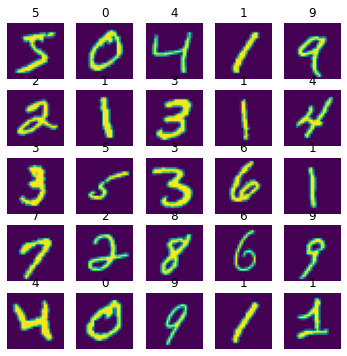

In [5]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.title(fl.train_data['y'][i])
    plt.imshow(fl.train_data['x'][i])

In [8]:
train_dataloader = torch.utils.data.DataLoader(
    FLCustomDataset(fl.train_data['x'],
                    fl.train_data['y'],
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1314,), (0.3090,))])
                   ),
    batch_size=configs['runtime']['batch_size'], shuffle=False
)

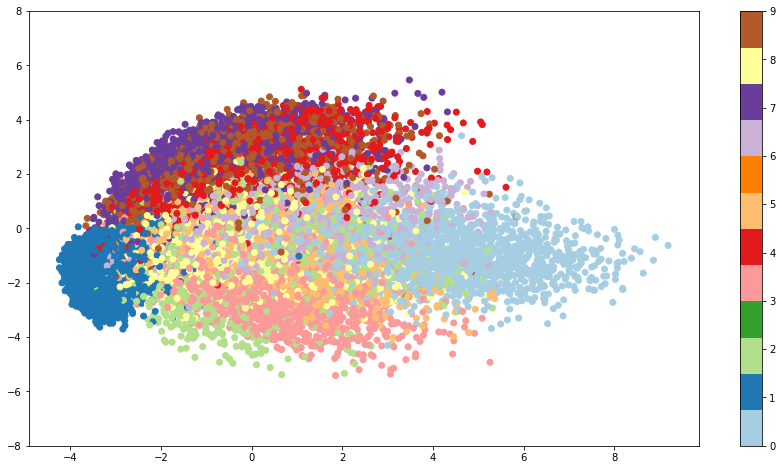

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(fl.train_data['x'].reshape(-1,784))
figure = plt.figure(figsize=(15, 8))
plt.scatter(proj[:, 0], proj[:,1], c = fl.train_data['y'], cmap="Paired")
plt.ylim([-8, 8])
plt.colorbar(ticks=range(10))